# Collaboration

In [1]:
# Setup

%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random

sys.path.insert(0, '..')
plt.rcParams['figure.figsize'] = [10, 8]

import walkers
from graph import Graph

In [2]:
resimulate = False

## 2 RWs on ER

In [3]:
# Parameters
n = 1000
d = 10
k = 1000
steps = 5*n

In [4]:
if resimulate:
    single_rw = walkers.RandomWalker()
    
    collab_rw1 = walkers.RandomWalker()
    collab_rw2 = walkers.RandomWalker()
    
    single_covered_avg = np.zeros(2*steps+1)
    collab_covered_avg = np.zeros(steps+1)
    
    for _ in range(k):
        graph = Graph.get_er_random_graph(n, d/n)
        
        single_rw.reset()
        collab_rw1.reset()
        collab_rw2.reset()
        
        single_rw.load_graph(graph)
        collab_rw1.load_graph(graph)
        collab_rw2.load_graph(graph)
        
        single_covered = np.zeros(2*steps+1)
        collab_covered = np.zeros(steps+1)
        
        single_visited = set([single_rw.cur])
        collab_visited = set([collab_rw1.cur, collab_rw2.cur])
        
        single_covered[0] = len(single_visited)
        collab_covered[0] = len(collab_visited)
        for i in range(1, steps+1):
            single_covered[i] = single_covered[i-1]
            single_rw.move()
            if single_rw.cur not in single_visited:
                single_visited.add(single_rw.cur)
                single_covered[i] += 1
            
            collab_covered[i] = collab_covered[i-1]
            collab_rw1.move()
            collab_rw2.move()
            if collab_rw1.cur not in collab_visited:
                collab_visited.add(collab_rw1.cur)
                collab_covered[i] += 1
            if collab_rw2.cur not in collab_visited:
                collab_visited.add(collab_rw2.cur)
                collab_covered[i] += 1
        collab_covered_avg += collab_covered
        
        for i in range(steps+1, 2*steps+1):
            single_covered[i] = single_covered[i-1]
            single_rw.move()
            if single_rw.cur not in single_visited:
                single_visited.add(single_rw.cur)
                single_covered[i] += 1
        single_covered_avg += single_covered
    
    single_covered_avg /= k
    collab_covered_avg /= k
            
    np.savetxt("single_covered_avg1.csv", single_covered_avg, delimiter=',')
    np.savetxt("collab_covered_avg1.csv", collab_covered_avg, delimiter=',')
else:
    single_covered_avg = np.loadtxt("single_covered_avg1.csv", delimiter=',')
    collab_covered_avg = np.loadtxt("collab_covered_avg1.csv", delimiter=',')

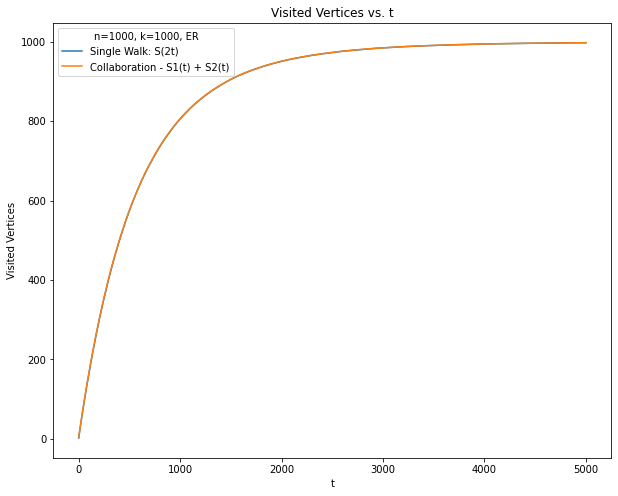

In [5]:
plt.plot(np.arange(1, steps+1, step=1),
         [single_covered_avg[i] for i in range(1, 2*steps+1, 2)], label='Single Walk: S(2t)')
plt.plot(np.arange(1, steps+1, step=1),
         collab_covered_avg[1:], label='Collaboration - S1(t) + S2(t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, ER")
plt.show()

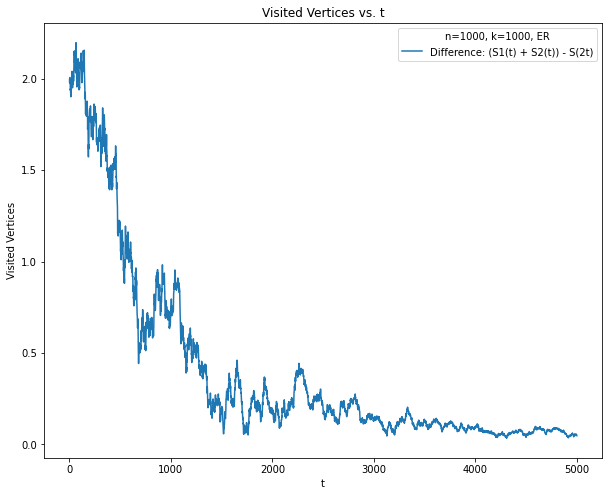

In [6]:
diff = collab_covered_avg[1:] - np.array([single_covered_avg[i] for i in range(1, 2*steps+1, 2)])
plt.plot(np.arange(1, steps+1, step=1), diff, label='Difference: (S1(t) + S2(t)) - S(2t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, ER")
plt.show()

In [7]:
k=1
single_rw = walkers.RandomWalker()

collab_rw1 = walkers.RandomWalker()
collab_rw2 = walkers.RandomWalker()

single_covered_avg = np.zeros(2*steps+1)
collab_covered_avg = np.zeros(steps+1)

for _ in range(k):
    graph = Graph.get_er_random_graph(n, d/n)

    single_rw.reset()
    collab_rw1.reset()
    collab_rw2.reset()

    single_rw.load_graph(graph)
    collab_rw1.load_graph(graph)
    collab_rw2.load_graph(graph)

    single_covered = np.zeros(2*steps+1)
    collab_covered = np.zeros(steps+1)

    single_visited = set([single_rw.cur])
    collab_visited = set([collab_rw1.cur, collab_rw2.cur])

    single_covered[0] = len(single_visited)
    collab_covered[0] = len(collab_visited)
    for i in range(1, steps+1):
        single_covered[i] = single_covered[i-1]
        single_rw.move()
        if single_rw.cur not in single_visited:
            single_visited.add(single_rw.cur)
            single_covered[i] += 1

        collab_covered[i] = collab_covered[i-1]
        collab_rw1.move()
        collab_rw2.move()
        if collab_rw1.cur not in collab_visited:
            collab_visited.add(collab_rw1.cur)
            collab_covered[i] += 1
        if collab_rw2.cur not in collab_visited:
            collab_visited.add(collab_rw2.cur)
            collab_covered[i] += 1
    collab_covered_avg += collab_covered

    for i in range(steps+1, 2*steps+1):
        single_covered[i] = single_covered[i-1]
        single_rw.move()
        if single_rw.cur not in single_visited:
            single_visited.add(single_rw.cur)
            single_covered[i] += 1
    single_covered_avg += single_covered

single_covered_avg /= k
collab_covered_avg /= k

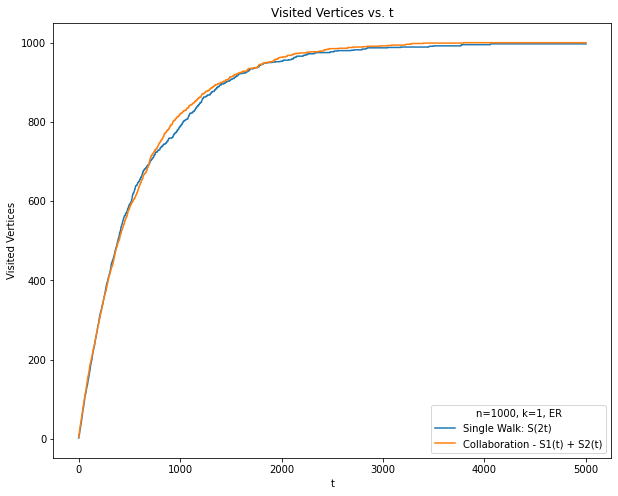

In [8]:
plt.plot(np.arange(1, steps+1, step=1),
         [single_covered_avg[i] for i in range(1, 2*steps+1, 2)], label='Single Walk: S(2t)')
plt.plot(np.arange(1, steps+1, step=1),
         collab_covered_avg[1:], label='Collaboration - S1(t) + S2(t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, ER")
plt.show()

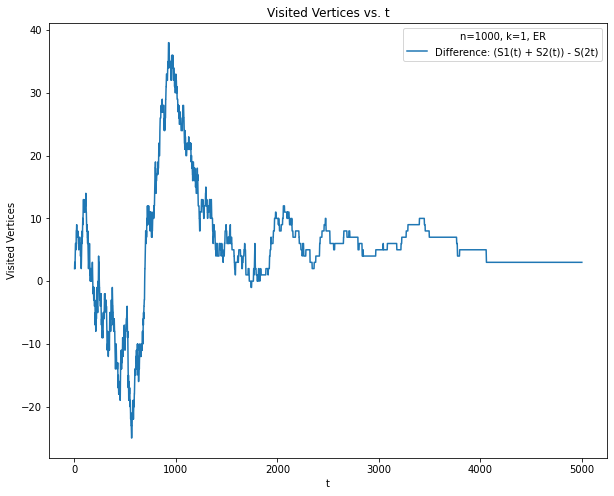

In [9]:
diff = collab_covered_avg[1:] - np.array([single_covered_avg[i] for i in range(1, 2*steps+1, 2)])
plt.plot(np.arange(1, steps+1, step=1), diff, label='Difference: (S1(t) + S2(t)) - S(2t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, ER")
plt.show()

## 3 RWs on ER

In [10]:
k = 1000
steps = 3*n
if resimulate:
    single_rw = walkers.RandomWalker()
    
    collab_rw1 = walkers.RandomWalker()
    collab_rw2 = walkers.RandomWalker()
    collab_rw3 = walkers.RandomWalker()
    
    single_covered_avg = np.zeros(3*steps+1)
    collab_covered_avg = np.zeros(steps+1)
    
    for _ in range(k):
        graph = Graph.get_er_random_graph(n, d/n)
        
        single_rw.reset()
        collab_rw1.reset()
        collab_rw2.reset()
        collab_rw3.reset()
        
        single_rw.load_graph(graph)
        collab_rw1.load_graph(graph)
        collab_rw2.load_graph(graph)
        collab_rw3.load_graph(graph)
        
        single_covered = np.zeros(3*steps+1)
        collab_covered = np.zeros(steps+1)
        
        single_visited = set([single_rw.cur])
        collab_visited = set([collab_rw1.cur, collab_rw2.cur, collab_rw3.cur])
        
        single_covered[0] = len(single_visited)
        collab_covered[0] = len(collab_visited)
        for i in range(1, steps+1):
            single_covered[i] = single_covered[i-1]
            single_rw.move()
            if single_rw.cur not in single_visited:
                single_visited.add(single_rw.cur)
                single_covered[i] += 1
            
            collab_covered[i] = collab_covered[i-1]
            collab_rw1.move()
            collab_rw2.move()
            collab_rw3.move()
            if collab_rw1.cur not in collab_visited:
                collab_visited.add(collab_rw1.cur)
                collab_covered[i] += 1
            if collab_rw2.cur not in collab_visited:
                collab_visited.add(collab_rw2.cur)
                collab_covered[i] += 1
            if collab_rw3.cur not in collab_visited:
                collab_visited.add(collab_rw3.cur)
                collab_covered[i] += 1
        collab_covered_avg += collab_covered
        
        for i in range(steps+1, 3*steps+1):
            single_covered[i] = single_covered[i-1]
            single_rw.move()
            if single_rw.cur not in single_visited:
                single_visited.add(single_rw.cur)
                single_covered[i] += 1
        single_covered_avg += single_covered
    
    single_covered_avg /= k
    collab_covered_avg /= k
            
    np.savetxt("single_covered_avg2.csv", single_covered_avg, delimiter=',')
    np.savetxt("collab_covered_avg2.csv", collab_covered_avg, delimiter=',')
else:
    single_covered_avg = np.loadtxt("single_covered_avg2.csv", delimiter=',')
    collab_covered_avg = np.loadtxt("collab_covered_avg2.csv", delimiter=',')

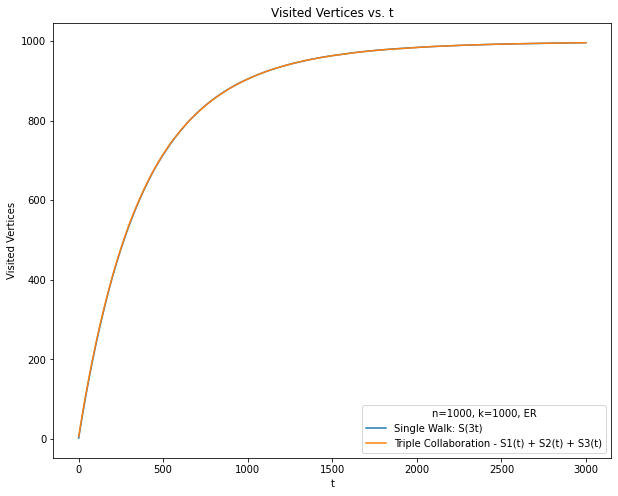

In [11]:
plt.plot(np.arange(1, steps+1, step=1),
         [single_covered_avg[i] for i in range(1, 3*steps+1, 3)], label='Single Walk: S(3t)')
plt.plot(np.arange(1, steps+1, step=1),
         collab_covered_avg[1:], label='Triple Collaboration - S1(t) + S2(t) + S3(t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, ER")
plt.show()

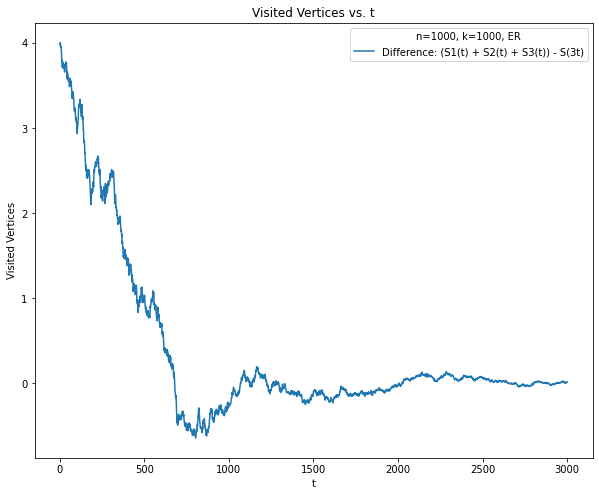

In [12]:
diff = collab_covered_avg[1:] - np.array([single_covered_avg[i] for i in range(1, 3*steps+1, 3)])
plt.plot(np.arange(1, steps+1, step=1), diff, label='Difference: (S1(t) + S2(t) + S3(t)) - S(3t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, ER")
plt.show()

In [13]:
k = 1
steps = 3*n
single_rw = walkers.RandomWalker()

collab_rw1 = walkers.RandomWalker()
collab_rw2 = walkers.RandomWalker()
collab_rw3 = walkers.RandomWalker()

single_covered_avg = np.zeros(3*steps+1)
collab_covered_avg = np.zeros(steps+1)

for _ in range(k):
    graph = Graph.get_k_regular_random_graph(d, n)

    single_rw.reset()
    collab_rw1.reset()
    collab_rw2.reset()
    collab_rw3.reset()

    single_rw.load_graph(graph)
    collab_rw1.load_graph(graph)
    collab_rw2.load_graph(graph)
    collab_rw3.load_graph(graph)

    single_covered = np.zeros(3*steps+1)
    collab_covered = np.zeros(steps+1)

    single_visited = set([single_rw.cur])
    collab_visited = set([collab_rw1.cur, collab_rw2.cur, collab_rw3.cur])

    single_covered[0] = len(single_visited)
    collab_covered[0] = len(collab_visited)
    for i in range(1, steps+1):
        single_covered[i] = single_covered[i-1]
        single_rw.move()
        if single_rw.cur not in single_visited:
            single_visited.add(single_rw.cur)
            single_covered[i] += 1

        collab_covered[i] = collab_covered[i-1]
        collab_rw1.move()
        collab_rw2.move()
        collab_rw3.move()
        if collab_rw1.cur not in collab_visited:
            collab_visited.add(collab_rw1.cur)
            collab_covered[i] += 1
        if collab_rw2.cur not in collab_visited:
            collab_visited.add(collab_rw2.cur)
            collab_covered[i] += 1
        if collab_rw3.cur not in collab_visited:
            collab_visited.add(collab_rw3.cur)
            collab_covered[i] += 1
    collab_covered_avg += collab_covered

    for i in range(steps+1, 3*steps+1):
        single_covered[i] = single_covered[i-1]
        single_rw.move()
        if single_rw.cur not in single_visited:
            single_visited.add(single_rw.cur)
            single_covered[i] += 1
    single_covered_avg += single_covered

single_covered_avg /= k
collab_covered_avg /= k

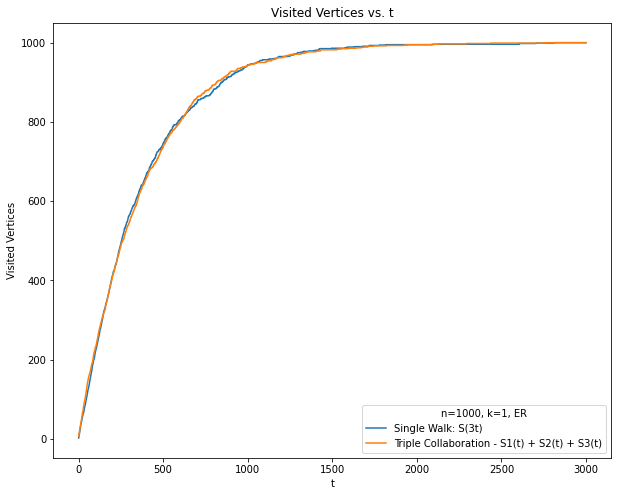

In [15]:
plt.plot(np.arange(1, steps+1, step=1),
         [single_covered_avg[i] for i in range(1, 3*steps+1, 3)], label='Single Walk: S(3t)')
plt.plot(np.arange(1, steps+1, step=1),
         collab_covered_avg[1:], label='Triple Collaboration - S1(t) + S2(t) + S3(t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, ER")
plt.show()

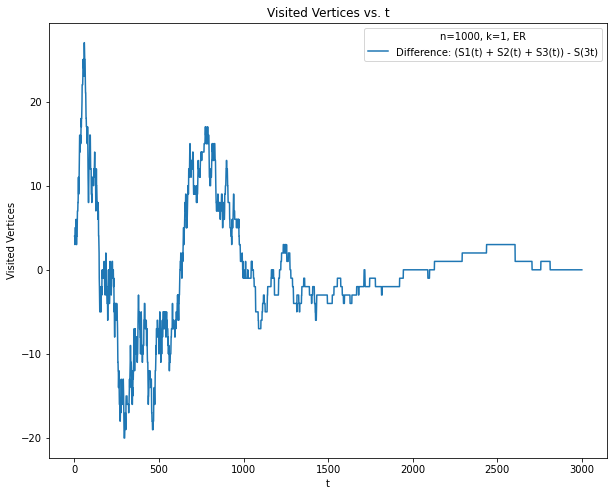

In [16]:
diff = collab_covered_avg[1:] - np.array([single_covered_avg[i] for i in range(1, 3*steps+1, 3)])
plt.plot(np.arange(1, steps+1, step=1), diff, label='Difference: (S1(t) + S2(t) + S3(t)) - S(3t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, ER")
plt.show()

## 2 RWs on  k-Regular

In [17]:
k = 1000
if resimulate:
    single_rw = walkers.RandomWalker()
    
    collab_rw1 = walkers.RandomWalker()
    collab_rw2 = walkers.RandomWalker()
    
    single_covered_avg = np.zeros(2*steps+1)
    collab_covered_avg = np.zeros(steps+1)
    
    for _ in range(k):
        graph = Graph.get_k_regular_random_graph(d, n)
        
        single_rw.reset()
        collab_rw1.reset()
        collab_rw2.reset()
        
        single_rw.load_graph(graph)
        collab_rw1.load_graph(graph)
        collab_rw2.load_graph(graph)
        
        single_covered = np.zeros(2*steps+1)
        collab_covered = np.zeros(steps+1)
        
        single_visited = set([single_rw.cur])
        collab_visited = set([collab_rw1.cur, collab_rw2.cur])
        
        single_covered[0] = len(single_visited)
        collab_covered[0] = len(collab_visited)
        for i in range(1, steps+1):
            single_covered[i] = single_covered[i-1]
            single_rw.move()
            if single_rw.cur not in single_visited:
                single_visited.add(single_rw.cur)
                single_covered[i] += 1
            
            collab_covered[i] = collab_covered[i-1]
            collab_rw1.move()
            collab_rw2.move()
            if collab_rw1.cur not in collab_visited:
                collab_visited.add(collab_rw1.cur)
                collab_covered[i] += 1
            if collab_rw2.cur not in collab_visited:
                collab_visited.add(collab_rw2.cur)
                collab_covered[i] += 1
        collab_covered_avg += collab_covered
        
        for i in range(steps+1, 2*steps+1):
            single_covered[i] = single_covered[i-1]
            single_rw.move()
            if single_rw.cur not in single_visited:
                single_visited.add(single_rw.cur)
                single_covered[i] += 1
        single_covered_avg += single_covered
    
    single_covered_avg /= k
    collab_covered_avg /= k
            
    np.savetxt("single_covered_avg3.csv", single_covered_avg, delimiter=',')
    np.savetxt("collab_covered_avg3.csv", collab_covered_avg, delimiter=',')
else:
    single_covered_avg = np.loadtxt("single_covered_avg3.csv", delimiter=',')
    collab_covered_avg = np.loadtxt("collab_covered_avg3.csv", delimiter=',')

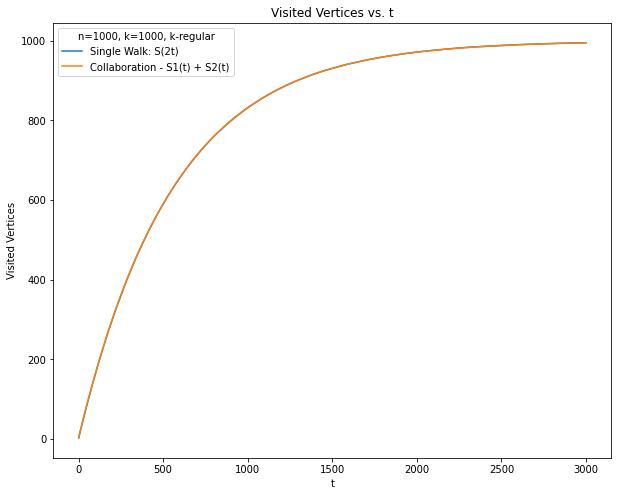

In [18]:
plt.plot(np.arange(1, steps+1, step=1),
         [single_covered_avg[i] for i in range(1, 2*steps+1, 2)], label='Single Walk: S(2t)')
plt.plot(np.arange(1, steps+1, step=1),
         collab_covered_avg[1:], label='Collaboration - S1(t) + S2(t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, k-regular")
plt.show()

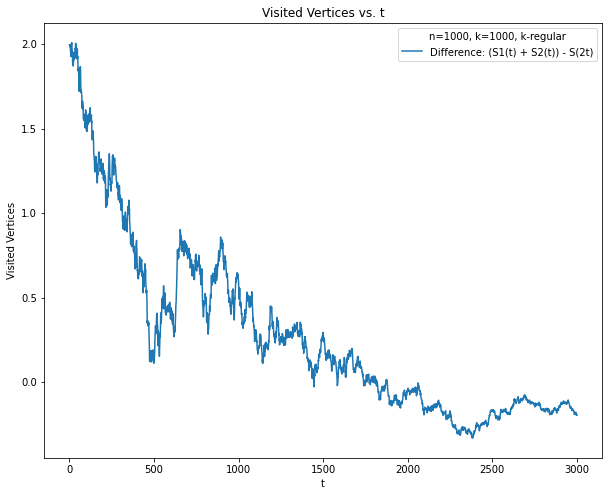

In [19]:
diff = collab_covered_avg[1:] - np.array([single_covered_avg[i] for i in range(1, 2*steps+1, 2)])
plt.plot(np.arange(1, steps+1, step=1), diff, label='Difference: (S1(t) + S2(t)) - S(2t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, k-regular")
plt.show()

In [20]:
k=1

single_rw = walkers.RandomWalker()

collab_rw1 = walkers.RandomWalker()
collab_rw2 = walkers.RandomWalker()

single_covered_avg = np.zeros(2*steps+1)
collab_covered_avg = np.zeros(steps+1)

for _ in range(k):
    graph = Graph.get_k_regular_random_graph(d, n)

    single_rw.reset()
    collab_rw1.reset()
    collab_rw2.reset()

    single_rw.load_graph(graph)
    collab_rw1.load_graph(graph)
    collab_rw2.load_graph(graph)

    single_covered = np.zeros(2*steps+1)
    collab_covered = np.zeros(steps+1)

    single_visited = set([single_rw.cur])
    collab_visited = set([collab_rw1.cur, collab_rw2.cur])

    single_covered[0] = len(single_visited)
    collab_covered[0] = len(collab_visited)
    for i in range(1, steps+1):
        single_covered[i] = single_covered[i-1]
        single_rw.move()
        if single_rw.cur not in single_visited:
            single_visited.add(single_rw.cur)
            single_covered[i] += 1

        collab_covered[i] = collab_covered[i-1]
        collab_rw1.move()
        collab_rw2.move()
        if collab_rw1.cur not in collab_visited:
            collab_visited.add(collab_rw1.cur)
            collab_covered[i] += 1
        if collab_rw2.cur not in collab_visited:
            collab_visited.add(collab_rw2.cur)
            collab_covered[i] += 1
    collab_covered_avg += collab_covered

    for i in range(steps+1, 2*steps+1):
        single_covered[i] = single_covered[i-1]
        single_rw.move()
        if single_rw.cur not in single_visited:
            single_visited.add(single_rw.cur)
            single_covered[i] += 1
    single_covered_avg += single_covered

single_covered_avg /= k
collab_covered_avg /= k

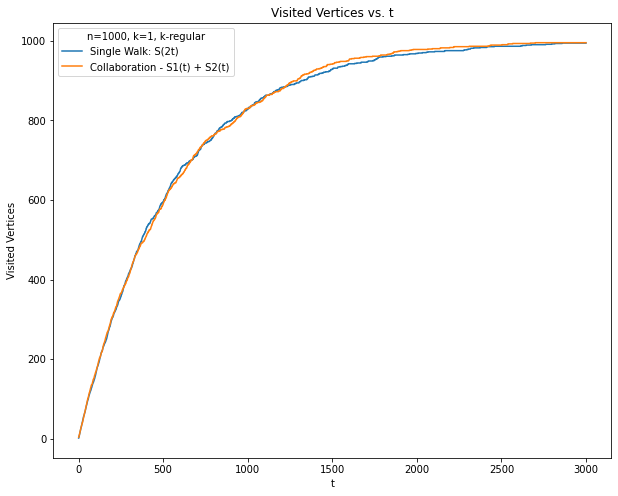

In [21]:
plt.plot(np.arange(1, steps+1, step=1),
         [single_covered_avg[i] for i in range(1, 2*steps+1, 2)], label='Single Walk: S(2t)')
plt.plot(np.arange(1, steps+1, step=1),
         collab_covered_avg[1:], label='Collaboration - S1(t) + S2(t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, k-regular")
plt.show()

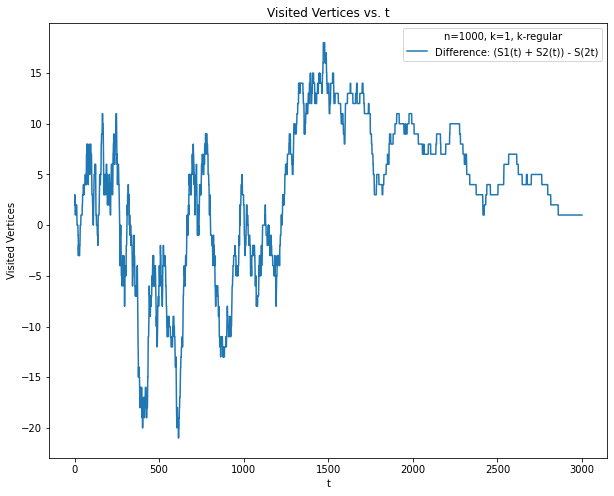

In [22]:
diff = collab_covered_avg[1:] - np.array([single_covered_avg[i] for i in range(1, 2*steps+1, 2)])
plt.plot(np.arange(1, steps+1, step=1), diff, label='Difference: (S1(t) + S2(t)) - S(2t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, k-regular")
plt.show()

## 3 RW on k-Reg

In [23]:
k = 1000
steps = 3*n
if resimulate:
    single_rw = walkers.RandomWalker()
    
    collab_rw1 = walkers.RandomWalker()
    collab_rw2 = walkers.RandomWalker()
    collab_rw3 = walkers.RandomWalker()
    
    single_covered_avg = np.zeros(3*steps+1)
    collab_covered_avg = np.zeros(steps+1)
    
    for _ in range(k):
        graph = Graph.get_k_regular_random_graph(d, n)
        
        single_rw.reset()
        collab_rw1.reset()
        collab_rw2.reset()
        collab_rw3.reset()
        
        single_rw.load_graph(graph)
        collab_rw1.load_graph(graph)
        collab_rw2.load_graph(graph)
        collab_rw3.load_graph(graph)
        
        single_covered = np.zeros(3*steps+1)
        collab_covered = np.zeros(steps+1)
        
        single_visited = set([single_rw.cur])
        collab_visited = set([collab_rw1.cur, collab_rw2.cur, collab_rw3.cur])
        
        single_covered[0] = len(single_visited)
        collab_covered[0] = len(collab_visited)
        for i in range(1, steps+1):
            single_covered[i] = single_covered[i-1]
            single_rw.move()
            if single_rw.cur not in single_visited:
                single_visited.add(single_rw.cur)
                single_covered[i] += 1
            
            collab_covered[i] = collab_covered[i-1]
            collab_rw1.move()
            collab_rw2.move()
            collab_rw3.move()
            if collab_rw1.cur not in collab_visited:
                collab_visited.add(collab_rw1.cur)
                collab_covered[i] += 1
            if collab_rw2.cur not in collab_visited:
                collab_visited.add(collab_rw2.cur)
                collab_covered[i] += 1
            if collab_rw3.cur not in collab_visited:
                collab_visited.add(collab_rw3.cur)
                collab_covered[i] += 1
        collab_covered_avg += collab_covered
        
        for i in range(steps+1, 3*steps+1):
            single_covered[i] = single_covered[i-1]
            single_rw.move()
            if single_rw.cur not in single_visited:
                single_visited.add(single_rw.cur)
                single_covered[i] += 1
        single_covered_avg += single_covered
    
    single_covered_avg /= k
    collab_covered_avg /= k
            
    np.savetxt("single_covered_avg4.csv", single_covered_avg, delimiter=',')
    np.savetxt("collab_covered_avg4.csv", collab_covered_avg, delimiter=',')
else:
    single_covered_avg = np.loadtxt("single_covered_avg4.csv", delimiter=',')
    collab_covered_avg = np.loadtxt("collab_covered_avg4.csv", delimiter=',')

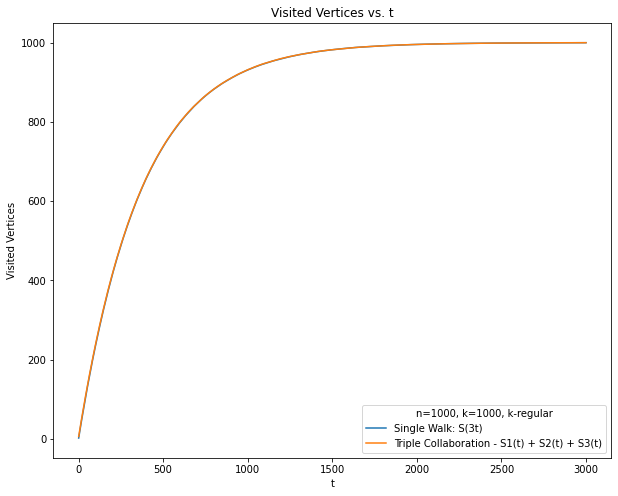

In [24]:
plt.plot(np.arange(1, steps+1, step=1),
         [single_covered_avg[i] for i in range(1, 3*steps+1, 3)], label='Single Walk: S(3t)')
plt.plot(np.arange(1, steps+1, step=1),
         collab_covered_avg[1:], label='Triple Collaboration - S1(t) + S2(t) + S3(t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, k-regular")
plt.show()

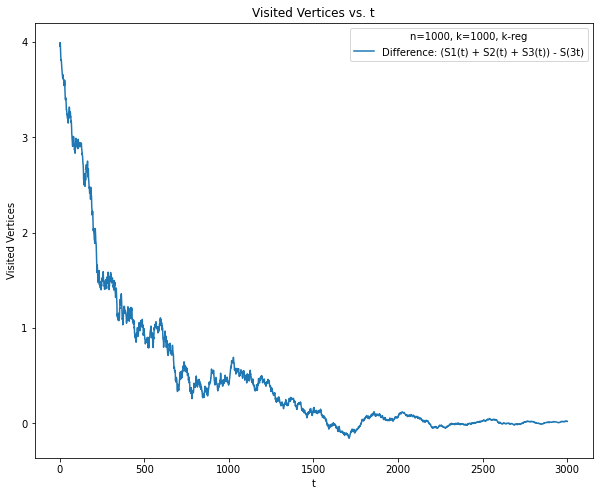

In [25]:
diff = collab_covered_avg[1:] - np.array([single_covered_avg[i] for i in range(1, 3*steps+1, 3)])
plt.plot(np.arange(1, steps+1, step=1), diff, label='Difference: (S1(t) + S2(t) + S3(t)) - S(3t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, k-reg")
plt.show()

In [26]:
k = 1
steps = 3*n
single_rw = walkers.RandomWalker()

collab_rw1 = walkers.RandomWalker()
collab_rw2 = walkers.RandomWalker()
collab_rw3 = walkers.RandomWalker()

single_covered_avg = np.zeros(3*steps+1)
collab_covered_avg = np.zeros(steps+1)

for _ in range(k):
    graph = Graph.get_k_regular_random_graph(d, n)

    single_rw.reset()
    collab_rw1.reset()
    collab_rw2.reset()
    collab_rw3.reset()

    single_rw.load_graph(graph)
    collab_rw1.load_graph(graph)
    collab_rw2.load_graph(graph)
    collab_rw3.load_graph(graph)

    single_covered = np.zeros(3*steps+1)
    collab_covered = np.zeros(steps+1)

    single_visited = set([single_rw.cur])
    collab_visited = set([collab_rw1.cur, collab_rw2.cur, collab_rw3.cur])

    single_covered[0] = len(single_visited)
    collab_covered[0] = len(collab_visited)
    for i in range(1, steps+1):
        single_covered[i] = single_covered[i-1]
        single_rw.move()
        if single_rw.cur not in single_visited:
            single_visited.add(single_rw.cur)
            single_covered[i] += 1

        collab_covered[i] = collab_covered[i-1]
        collab_rw1.move()
        collab_rw2.move()
        collab_rw3.move()
        if collab_rw1.cur not in collab_visited:
            collab_visited.add(collab_rw1.cur)
            collab_covered[i] += 1
        if collab_rw2.cur not in collab_visited:
            collab_visited.add(collab_rw2.cur)
            collab_covered[i] += 1
        if collab_rw3.cur not in collab_visited:
            collab_visited.add(collab_rw3.cur)
            collab_covered[i] += 1
    collab_covered_avg += collab_covered

    for i in range(steps+1, 3*steps+1):
        single_covered[i] = single_covered[i-1]
        single_rw.move()
        if single_rw.cur not in single_visited:
            single_visited.add(single_rw.cur)
            single_covered[i] += 1
    single_covered_avg += single_covered

single_covered_avg /= k
collab_covered_avg /= k

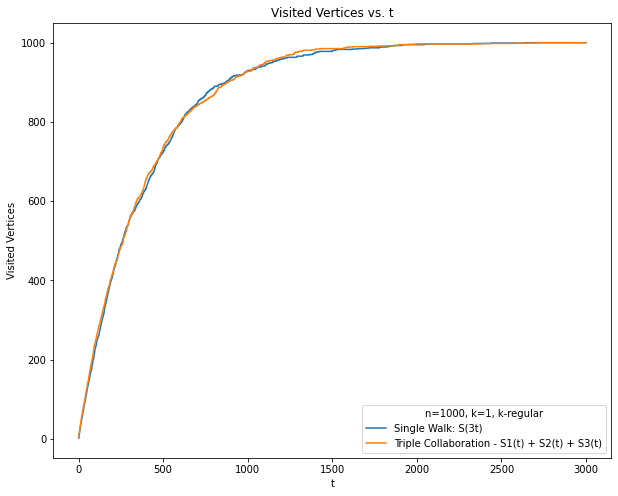

In [27]:
plt.plot(np.arange(1, steps+1, step=1),
         [single_covered_avg[i] for i in range(1, 3*steps+1, 3)], label='Single Walk: S(3t)')
plt.plot(np.arange(1, steps+1, step=1),
         collab_covered_avg[1:], label='Triple Collaboration - S1(t) + S2(t) + S3(t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, k-regular")
plt.show()

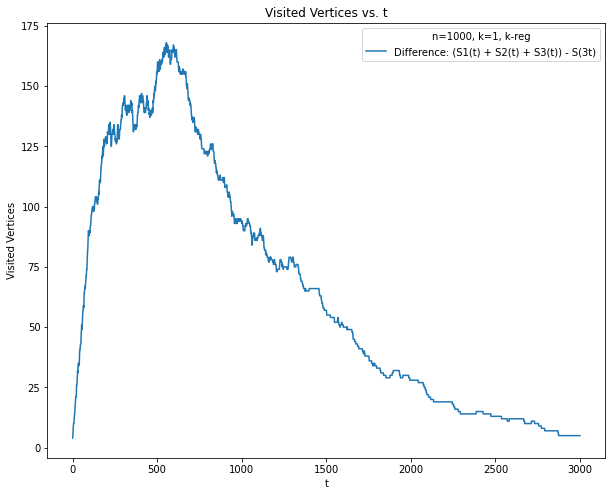

In [28]:
diff = collab_covered_avg[1:] - np.array([single_covered_avg[i] for i in range(1, 2*steps+1, 2)])
plt.plot(np.arange(1, steps+1, step=1), diff, label='Difference: (S1(t) + S2(t) + S3(t)) - S(3t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, k-reg")
plt.show()

## 3 RW Star Shape on ER

In [29]:
k = 1000
steps = 3*n
if resimulate:
    single_rw = walkers.RandomWalker()
    
    collab_rw1 = walkers.RandomWalker()
    collab_rw2 = walkers.RandomWalker()
    collab_rw3 = walkers.RandomWalker()
    
    single_covered_avg = np.zeros(3*steps+1)
    collab_covered_avg = np.zeros(steps+1)
    
    for _ in range(k):
        graph = Graph.get_er_random_graph(n, d/n)
        
        single_rw.reset()
        collab_rw1.reset()
        collab_rw2.reset()
        collab_rw3.reset()
        
        single_rw.load_graph(graph)
        collab_rw1.load_graph(graph)
        collab_rw2.load_graph(graph)
        collab_rw3.load_graph(graph)
        
        single_covered = np.zeros(3*steps+1)
        collab_covered = np.zeros(steps+1)
        
        single_visited = set([single_rw.cur])
        collab_visited = set([collab_rw1.cur])
        
        # set starting point to be the same
        collab_rw2.cur = collab_rw1.cur
        collab_rw3.cur = collab_rw1.cur
        
        single_covered[0] = len(single_visited)
        collab_covered[0] = len(collab_visited)
        for i in range(1, steps+1):
            single_covered[i] = single_covered[i-1]
            single_rw.move()
            if single_rw.cur not in single_visited:
                single_visited.add(single_rw.cur)
                single_covered[i] += 1
            
            collab_covered[i] = collab_covered[i-1]
            collab_rw1.move()
            collab_rw2.move()
            collab_rw3.move()
            if collab_rw1.cur not in collab_visited:
                collab_visited.add(collab_rw1.cur)
                collab_covered[i] += 1
            if collab_rw2.cur not in collab_visited:
                collab_visited.add(collab_rw2.cur)
                collab_covered[i] += 1
            if collab_rw3.cur not in collab_visited:
                collab_visited.add(collab_rw3.cur)
                collab_covered[i] += 1
        collab_covered_avg += collab_covered
        
        for i in range(steps+1, 3*steps+1):
            single_covered[i] = single_covered[i-1]
            single_rw.move()
            if single_rw.cur not in single_visited:
                single_visited.add(single_rw.cur)
                single_covered[i] += 1
        single_covered_avg += single_covered
    
    single_covered_avg /= k
    collab_covered_avg /= k
            
    np.savetxt("single_covered_avg5.csv", single_covered_avg, delimiter=',')
    np.savetxt("collab_covered_avg5.csv", collab_covered_avg, delimiter=',')
else:
    single_covered_avg = np.loadtxt("single_covered_avg5.csv", delimiter=',')
    collab_covered_avg = np.loadtxt("collab_covered_avg5.csv", delimiter=',')

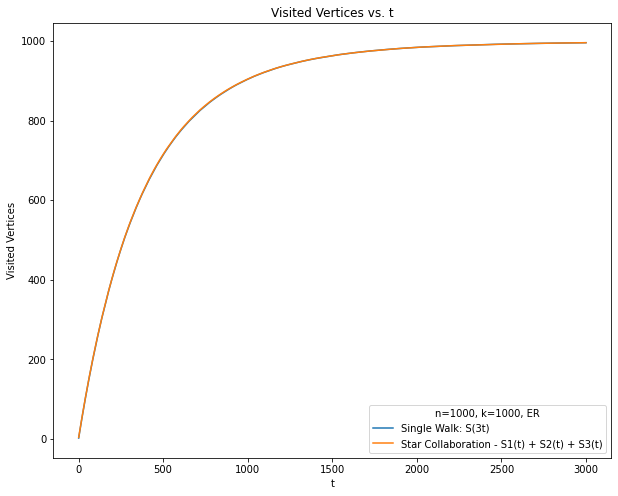

In [30]:
plt.plot(np.arange(1, steps+1, step=1),
         [single_covered_avg[i] for i in range(1, 3*steps+1, 3)], label='Single Walk: S(3t)')
plt.plot(np.arange(1, steps+1, step=1),
         collab_covered_avg[1:], label='Star Collaboration - S1(t) + S2(t) + S3(t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, ER")
plt.show()

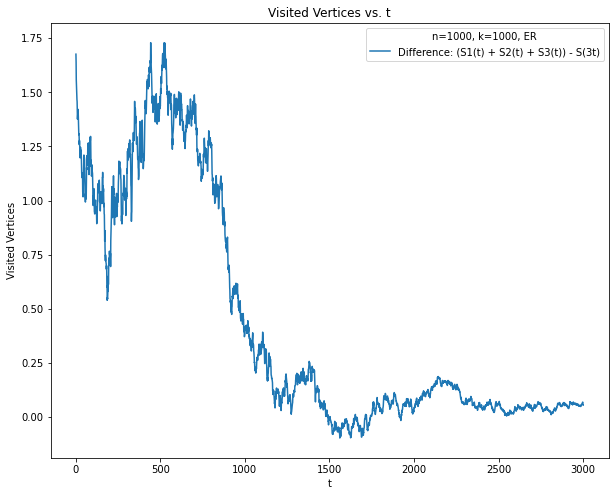

In [32]:
diff = collab_covered_avg[1:] - np.array([single_covered_avg[i] for i in range(1, 3*steps+1, 3)])
plt.plot(np.arange(1, steps+1, step=1), diff, label='Difference: (S1(t) + S2(t) + S3(t)) - S(3t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, ER")
plt.show()

In [34]:
k = 1
single_rw = walkers.RandomWalker()
    
collab_rw1 = walkers.RandomWalker()
collab_rw2 = walkers.RandomWalker()
collab_rw3 = walkers.RandomWalker()

single_covered_avg = np.zeros(3*steps+1)
collab_covered_avg = np.zeros(steps+1)

for _ in range(k):
    graph = Graph.get_er_random_graph(n, d/n)

    single_rw.reset()
    collab_rw1.reset()
    collab_rw2.reset()
    collab_rw3.reset()

    single_rw.load_graph(graph)
    collab_rw1.load_graph(graph)
    collab_rw2.load_graph(graph)
    collab_rw3.load_graph(graph)

    single_covered = np.zeros(3*steps+1)
    collab_covered = np.zeros(steps+1)

    single_visited = set([single_rw.cur])
    collab_visited = set([collab_rw1.cur])

    # set starting point to be the same
    collab_rw2.cur = collab_rw1.cur
    collab_rw3.cur = collab_rw1.cur

    single_covered[0] = len(single_visited)
    collab_covered[0] = len(collab_visited)
    for i in range(1, steps+1):
        single_covered[i] = single_covered[i-1]
        single_rw.move()
        if single_rw.cur not in single_visited:
            single_visited.add(single_rw.cur)
            single_covered[i] += 1

        collab_covered[i] = collab_covered[i-1]
        collab_rw1.move()
        collab_rw2.move()
        collab_rw3.move()
        if collab_rw1.cur not in collab_visited:
            collab_visited.add(collab_rw1.cur)
            collab_covered[i] += 1
        if collab_rw2.cur not in collab_visited:
            collab_visited.add(collab_rw2.cur)
            collab_covered[i] += 1
        if collab_rw3.cur not in collab_visited:
            collab_visited.add(collab_rw3.cur)
            collab_covered[i] += 1
    collab_covered_avg += collab_covered

    for i in range(steps+1, 3*steps+1):
        single_covered[i] = single_covered[i-1]
        single_rw.move()
        if single_rw.cur not in single_visited:
            single_visited.add(single_rw.cur)
            single_covered[i] += 1
    single_covered_avg += single_covered

single_covered_avg /= k
collab_covered_avg /= k

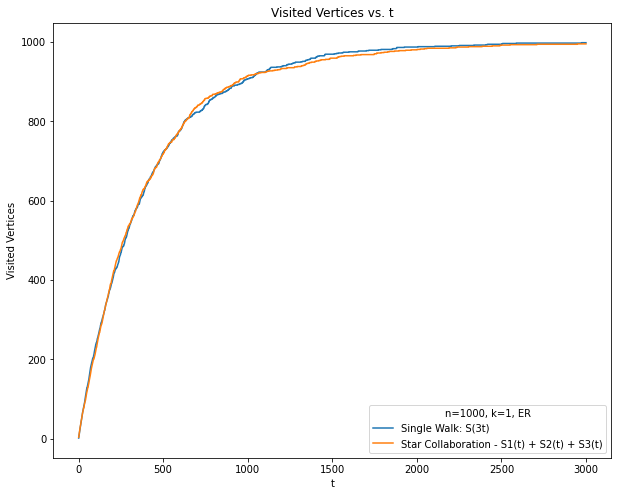

In [35]:
plt.plot(np.arange(1, steps+1, step=1),
         [single_covered_avg[i] for i in range(1, 3*steps+1, 3)], label='Single Walk: S(3t)')
plt.plot(np.arange(1, steps+1, step=1),
         collab_covered_avg[1:], label='Star Collaboration - S1(t) + S2(t) + S3(t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, ER")
plt.show()

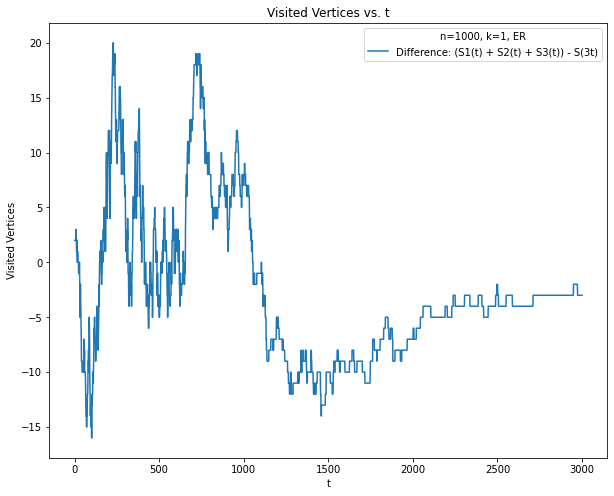

In [36]:
diff = collab_covered_avg[1:] - np.array([single_covered_avg[i] for i in range(1, 3*steps+1, 3)])
plt.plot(np.arange(1, steps+1, step=1), diff, label='Difference: (S1(t) + S2(t) + S3(t)) - S(3t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, ER")
plt.show()

## 3 RW Star on k-Reg

In [38]:
k = 1000
steps = 3*n
resimulate=True
if resimulate:
    single_rw = walkers.RandomWalker()
    
    collab_rw1 = walkers.RandomWalker()
    collab_rw2 = walkers.RandomWalker()
    collab_rw3 = walkers.RandomWalker()
    
    single_covered_avg = np.zeros(3*steps+1)
    collab_covered_avg = np.zeros(steps+1)
    
    for _ in range(k):
        graph = Graph.get_k_regular_random_graph(d, n)
        
        single_rw.reset()
        collab_rw1.reset()
        collab_rw2.reset()
        collab_rw3.reset()
        
        single_rw.load_graph(graph)
        collab_rw1.load_graph(graph)
        collab_rw2.load_graph(graph)
        collab_rw3.load_graph(graph)
        
        single_covered = np.zeros(3*steps+1)
        collab_covered = np.zeros(steps+1)
        
        single_visited = set([single_rw.cur])
        collab_visited = set([collab_rw1.cur])
        
        # set starting point to be the same
        collab_rw2.cur = collab_rw1.cur
        collab_rw3.cur = collab_rw1.cur
        
        single_covered[0] = len(single_visited)
        collab_covered[0] = len(collab_visited)
        for i in range(1, steps+1):
            single_covered[i] = single_covered[i-1]
            single_rw.move()
            if single_rw.cur not in single_visited:
                single_visited.add(single_rw.cur)
                single_covered[i] += 1
            
            collab_covered[i] = collab_covered[i-1]
            collab_rw1.move()
            collab_rw2.move()
            collab_rw3.move()
            if collab_rw1.cur not in collab_visited:
                collab_visited.add(collab_rw1.cur)
                collab_covered[i] += 1
            if collab_rw2.cur not in collab_visited:
                collab_visited.add(collab_rw2.cur)
                collab_covered[i] += 1
            if collab_rw3.cur not in collab_visited:
                collab_visited.add(collab_rw3.cur)
                collab_covered[i] += 1
        collab_covered_avg += collab_covered
        
        for i in range(steps+1, 3*steps+1):
            single_covered[i] = single_covered[i-1]
            single_rw.move()
            if single_rw.cur not in single_visited:
                single_visited.add(single_rw.cur)
                single_covered[i] += 1
        single_covered_avg += single_covered
    
    single_covered_avg /= k
    collab_covered_avg /= k
            
    np.savetxt("single_covered_avg6.csv", single_covered_avg, delimiter=',')
    np.savetxt("collab_covered_avg6.csv", collab_covered_avg, delimiter=',')
else:
    single_covered_avg = np.loadtxt("single_covered_avg6.csv", delimiter=',')
    collab_covered_avg = np.loadtxt("collab_covered_avg6.csv", delimiter=',')

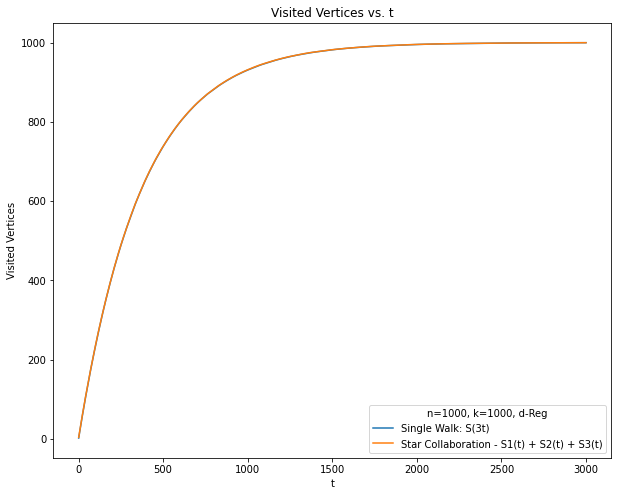

In [39]:
plt.plot(np.arange(1, steps+1, step=1),
         [single_covered_avg[i] for i in range(1, 3*steps+1, 3)], label='Single Walk: S(3t)')
plt.plot(np.arange(1, steps+1, step=1),
         collab_covered_avg[1:], label='Star Collaboration - S1(t) + S2(t) + S3(t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, d-Reg")
plt.show()

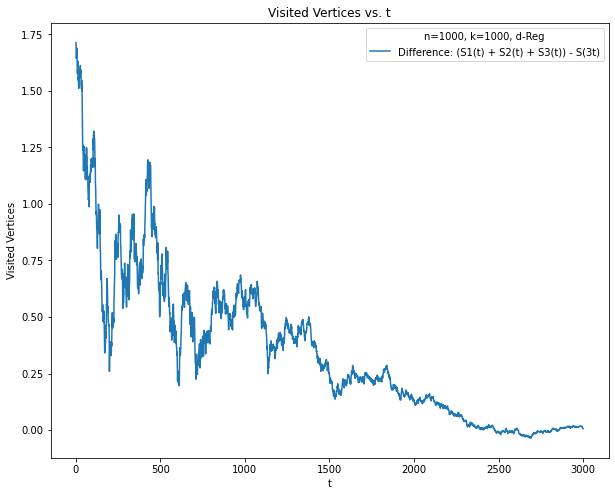

In [40]:
diff = collab_covered_avg[1:] - np.array([single_covered_avg[i] for i in range(1, 3*steps+1, 3)])
plt.plot(np.arange(1, steps+1, step=1), diff, label='Difference: (S1(t) + S2(t) + S3(t)) - S(3t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, d-Reg")
plt.show()

In [41]:
k=1
single_rw = walkers.RandomWalker()
    
collab_rw1 = walkers.RandomWalker()
collab_rw2 = walkers.RandomWalker()
collab_rw3 = walkers.RandomWalker()

single_covered_avg = np.zeros(3*steps+1)
collab_covered_avg = np.zeros(steps+1)

for _ in range(k):
    graph = Graph.get_k_regular_random_graph(d, n)

    single_rw.reset()
    collab_rw1.reset()
    collab_rw2.reset()
    collab_rw3.reset()

    single_rw.load_graph(graph)
    collab_rw1.load_graph(graph)
    collab_rw2.load_graph(graph)
    collab_rw3.load_graph(graph)

    single_covered = np.zeros(3*steps+1)
    collab_covered = np.zeros(steps+1)

    single_visited = set([single_rw.cur])
    collab_visited = set([collab_rw1.cur])

    # set starting point to be the same
    collab_rw2.cur = collab_rw1.cur
    collab_rw3.cur = collab_rw1.cur

    single_covered[0] = len(single_visited)
    collab_covered[0] = len(collab_visited)
    for i in range(1, steps+1):
        single_covered[i] = single_covered[i-1]
        single_rw.move()
        if single_rw.cur not in single_visited:
            single_visited.add(single_rw.cur)
            single_covered[i] += 1

        collab_covered[i] = collab_covered[i-1]
        collab_rw1.move()
        collab_rw2.move()
        collab_rw3.move()
        if collab_rw1.cur not in collab_visited:
            collab_visited.add(collab_rw1.cur)
            collab_covered[i] += 1
        if collab_rw2.cur not in collab_visited:
            collab_visited.add(collab_rw2.cur)
            collab_covered[i] += 1
        if collab_rw3.cur not in collab_visited:
            collab_visited.add(collab_rw3.cur)
            collab_covered[i] += 1
    collab_covered_avg += collab_covered

    for i in range(steps+1, 3*steps+1):
        single_covered[i] = single_covered[i-1]
        single_rw.move()
        if single_rw.cur not in single_visited:
            single_visited.add(single_rw.cur)
            single_covered[i] += 1
    single_covered_avg += single_covered

single_covered_avg /= k
collab_covered_avg /= k

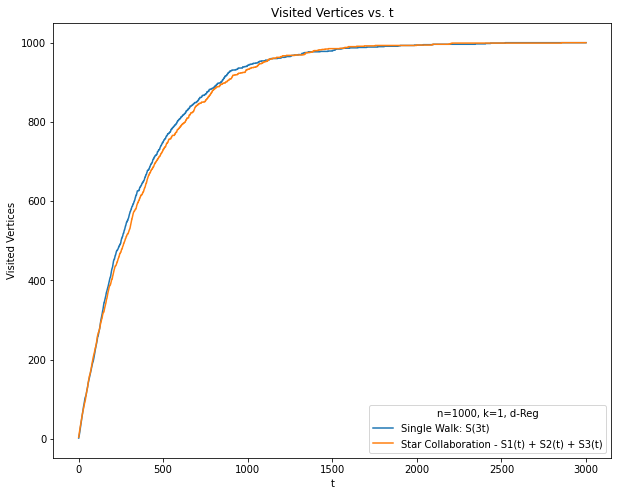

In [42]:
plt.plot(np.arange(1, steps+1, step=1),
         [single_covered_avg[i] for i in range(1, 3*steps+1, 3)], label='Single Walk: S(3t)')
plt.plot(np.arange(1, steps+1, step=1),
         collab_covered_avg[1:], label='Star Collaboration - S1(t) + S2(t) + S3(t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, d-Reg")
plt.show()

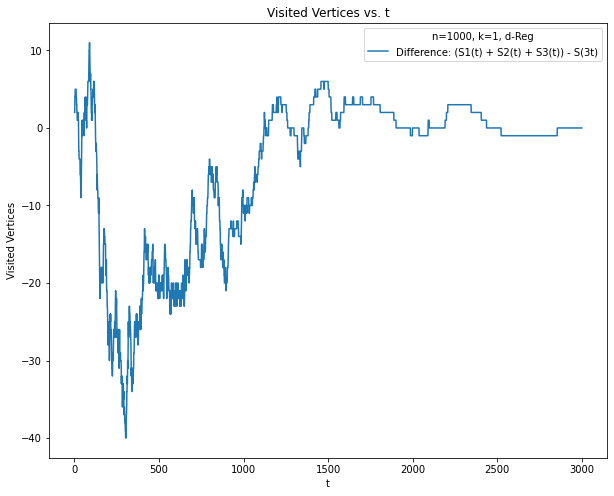

In [43]:
diff = collab_covered_avg[1:] - np.array([single_covered_avg[i] for i in range(1, 3*steps+1, 3)])
plt.plot(np.arange(1, steps+1, step=1), diff, label='Difference: (S1(t) + S2(t) + S3(t)) - S(3t)')
plt.title("Visited Vertices vs. t")
plt.xlabel("t")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, d-Reg")
plt.show()